# Creating Custom Dataset

Done using the google-play-scrapper library on github

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!pip install -qq google-play-scraper

     |████████████████████████████████| 51kB 2.7MB/s 


In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

To prevent any kind of bias in the data collection process - avoid domain specific words and all, we choose a single category of apps and use that for our scraper datset. 

Specifically targetting todo applications, calendar applications etc. 

In [5]:
app_packages = [

  'com.anydo',
  'com.todoist',
  'com.ticktick.task',
  'com.habitrpg.android.habitica',
  'cc.forestapp',
  'com.oristats.habitbull',
  'com.levor.liferpgtasks',
  'com.habitnow',
  'com.microsoft.todos',
  'prox.lab.calclock',
  'com.gmail.jmartindev.timetune',
  'com.artfulagenda.app',
  'com.tasks.android',
  'com.appgenix.bizcal',
  'com.appxy.planner'
]

In [6]:
app_infos = []

for ap in tqdm(app_packages):
  info = app(ap,lang='en', country='us')
  del info['comments']
  app_infos.append(info)

100%|██████████| 15/15 [00:02<00:00,  5.51it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
      json_object, 
      indent=2, 
      sort_keys = True,
      default = str
  )

  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[0])

{
  "adSupported": null,
  "androidVersion": "Varies",
  "androidVersionText": "Varies with device",
  "appId": "com.anydo",
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "<b>\ud83c\udfc6 Editor's Choice by Google</b>\r\n\r\nIt's the #1 to-do list, reminders, planner & calendar app.\r\nOver 30M people rely on Any.do to stay organized and get more done.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY, WSJ).</b>\r\n\r\nAny.do is a  free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists and more.\r\n\r\n\ud83d\udcc5 Organize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events always at hand with our calendar widget. Any.do to-do list & planner support daily calendar view, 3-day Calendar view, Weekly calendar view & 

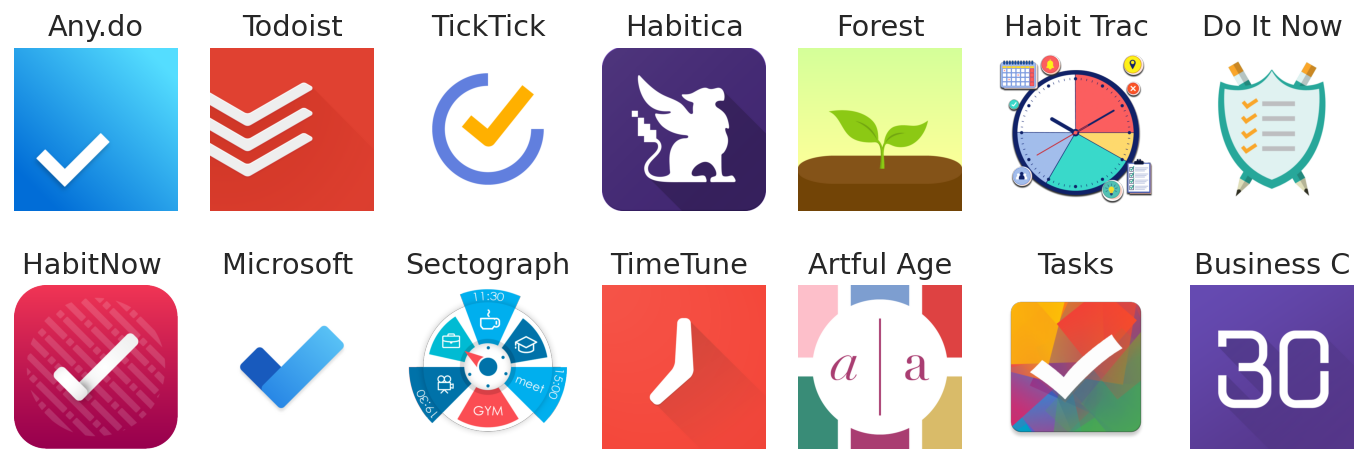

In [9]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]
  

fig, axs = plt.subplots(2, len(app_infos)//2, figsize=(12,4))

for i, ax in enumerate(axs.flat):
  ai = app_infos[i]
  img = plt.imread(ai['icon'])
  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

In [10]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

,title,description,descriptionHTML,summary,summaryHTML,installs,minInstalls,score,ratings,reviews,histogram,price,free,currency,sale,saleTime,originalPrice,saleText,offersIAP,inAppProductPrice,size,androidVersion,androidVersionText,developer,developerId,developerEmail,developerWebsite,developerAddress,privacyPolicy,developerInternalID,genre,genreId,icon,headerImage,screenshots,video,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,recentChanges,recentChangesHTML,editorsChoice,appId,url
0,"Any.do: To do list, Reminders, Planner & Calendar",<b>🏆 Editor's Choice by Google</b>\r\n\r\nIt's...,<b>🏆 Editor&#39;s Choice by Google</b><br><br>...,To-do list ✅ Task Manager 📅ֿ Agenda 📝 Reminder...,To-do list ✅ Task Manager 📅ֿ Agenda 📝 Reminder...,"10,000,000+",10000000,4.358959,359087,127261,"[32247, 11028, 17465, 33185, 265162]",0,True,USD,False,None,None,None,True,$0.99 - $83.88 per item,Varies with device,Varies,Varies with device,Any.do To-do list & Calendar,5304780265295461149,feedback+androidtodo@any.do,https://www.any.do,"Any.do Inc.\n\n6 Agripas Street, Tel Aviv\n62...",https://www.any.do/privacy,5304780265295461149,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/zgOLUXCH...,https://play-lh.googleusercontent.com/umhDP6ph...,[https://play-lh.googleusercontent.com/As3cku8...,https://www.youtube.com/embed/2nkllLD0x6o?ps=p...,https://i.ytimg.com/vi/2nkllLD0x6o/hqdefault.jpg,Everyone,None,None,False,"Nov 10, 2011",1607624081,Varies with device,"- Dark mode is finally here, hooray! \r\n- Rec...","- Dark mode is finally here, hooray! <br>- Rec...",False,com.anydo,https://play.google.com/store/apps/details?id=...
1,"Todoist: To-Do List, Tasks & Reminders","🏆 <b>2020 Editor's Choice</b> by Google\r\n🥇 ""...",🏆 <b>2020 Editor&#39;s Choice</b> by Google<br...,"""The best to-do list"" — The Verge. Tasks ✅ Rem...",&quot;The best to-do list&quot; — The Verge. T...,"10,000,000+",10000000,4.545459,214428,65241,"[8560, 3821, 8181, 35399, 158467]",0,True,USD,False,None,None,None,True,$0.99 - $36.00 per item,Varies with device,Varies,Varies with device,Doist,6748661820728732000,support@todoist.com,http://todoist.com,"Doist\n201 Mission Street, Suite 1200\nSan Fra...",https://todoist.com/Help/viewPrivacyPolicy,6748661820728732000,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/GK0SwEBV...,https://play-lh.googleusercontent.com/sAjzU1fU...,[https://play-lh.googleusercontent.com/cealfl9...,None,None,Everyone,None,None,False,"Nov 18, 2012",1608565381,Varies with device,⭐ It’s never been easier to use Todoist with y...,⭐ It’s never been easier to use Todoist with y...,True,com.todoist,https://play.google.com/store/apps/details?id=...
2,"TickTick: ToDo List Planner, Reminder & Calendar",🏆<b>Editor's Choice</b> by Google\r\n🥇<b>Great...,🏆<b>Editor&#39;s Choice</b> by Google<br>🥇<b>G...,Task & time manager by Editor’s Choice🏆. Get t...,Task &amp; time manager by Editor’s Choice🏆. G...,"1,000,000+",1000000,4.612812,70472,25837,"[2396, 1103, 2525, 9337, 55111]",0,True,USD,False,None,None,None,True,$0.99 - $27.99 per item,Varies with device,Varies,Varies with device,Appest Inc.,7269704759597705101,ticktick.com@gmail.com,https://ticktick.com,2035 Sunset Lake Road\nNewark\nDelaware\nUS,https://ticktick.com/about/privacy,7269704759597705101,Productivity,PRODUCTIVITY,https://play-lh.googleusercontent.com/YSlqf3WB...,https://play-lh.googleusercontent.com/m-kwaaJE...,[https://play-lh.googleusercontent.com/ltTfT_1...,None,None,Everyone,None,None,False,"Jun 19, 2013",1608085495,Varies with device,5875\r\n🖍️ Highlighted keywords to help you qu...,5875<br>🖍️ Highlighted keywords to help you qu...,True,com.ticktick.task,https://play.google.com/store/apps/details?id=...
3,Habitica: Gamify Your Tasks,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated ...,Treat your life like a game to stay motivated 

In [16]:
root_path = "/content/gdrive/MyDrive/Collab-Notebooks/Sentiment-Analysis/"

In [17]:
app_infos_df.to_csv(root_path+'apps.csv', index = None, header = True)

# Getting Reviews


Getting reviews with respect to downloading all star reviews to mitigate any kind of bias issue. This is a common issue in the available datasets online nowadays. 

In [38]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs,_ = reviews(
          ap,
          lang='en',
          country = 'us',
          sort = sort_order,
          count = 200 if score == 3 else 100,
          #score as such because, converting score to 1-2 : negative, 3:neutral and everythign else is positive sentiment
          filter_score_with=score
        )

      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap

      app_reviews.extend(rvs)

100%|██████████| 15/15 [00:28<00:00,  1.93s/it]


In [39]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "at": "2020-12-21 01:58:55",
  "content": "Can't get into my account and it's been days going back and forth with days in between taking support to answer. I can't log in or use forget password doesn't work! I used this every day before. Guess it's time for a new app! Because I've lost everything since I can't access it!",
  "repliedAt": null,
  "replyContent": null,
  "reviewCreatedVersion": "5.7.0.20",
  "reviewId": "gp:AOqpTOGOU1svA5gsifHKHFSziUGg7FDs9zR0HbVyXyatKl6FLMQSbTjVHWxnDsKddQej2CZxXn1Uc3rk6-sZNA",
  "score": 1,
  "sortOrder": "most_relevant",
  "thumbsUpCount": 8,
  "userImage": "https://play-lh.googleusercontent.com/a-/AOh14GjePmkarNd8U9qVaOY4b4T7f71fqc4u4L7B4NY4NKk",
  "userName": "trina croll"
}



In [40]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(16354, 12)

In [42]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOGOU1svA5gsifHKHFSziUGg7FDs9zR0HbVyXya...,trina croll,https://play-lh.googleusercontent.com/a-/AOh14...,Can't get into my account and it's been days g...,1,8,5.7.0.20,2020-12-21 01:58:55,None,NaT,most_relevant,com.anydo
1,gp:AOqpTOEJfVU5Os7_8CNOu_mpy2AlDz8kFxEFMeBMnxC...,Yiğitcan Sümbelli,https://play-lh.googleusercontent.com/a-/AOh14...,I am starting to hate this app! Every time the...,1,63,5.7.0.10,2020-12-02 15:52:24,"Hi, please note that these issues usually are ...",2020-12-03 20:47:02,most_relevant,com.anydo
2,gp:AOqpTOHhd6uZpuhbBDDxEB1SwF8zXXUh8sg6AMGlkBx...,Chris Keyes,https://play-lh.googleusercontent.com/a-/AOh14...,I paid premium for years. No more! This app ha...,1,24,5.7.0.10,2020-12-15 00:58:57,Sorry you feel this way. Any.do does not chang...,2020-12-17 09:28:09,most_relevant,com.anydo
3,gp:AOqpTOFSPaoOVarqwKF86e7-TPUyV6BanSXKRNFGb6G...,Jon Pember,https://play-lh.googleusercontent.com/-97UNn5D...,"Liked Any.do at first, enough that I even sign...",1,102,5.7.0.10,2020-11-22 23:42:56,Please note that Any.do integrates directly wi...,2020-11-25 13:30:01,most_relevant,com.anydo
4,gp:AOqpTOEA0ubPA5n0s_6lg0BHqfQqj0gi-KIdZF_I1yZ...,Lisa Pappas,https://play-lh.googleusercontent.com/a-/AOh14...,Constant crashing. After reading all the negat...,1,25,5.6.0.6,2020-10-21 17:45:24,None,NaT,most_relevant,com.anydo


In [43]:
app_reviews_df.to_csv(root_path+'reviews.csv', index=None, header=True)